Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

### Returning to our forensic science example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)? 




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset. 

**We wish to determine if we can improve our model of the relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [26]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()


,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


At the point we left off yesterday, we'd tested for and found a statisticaly significant relationship between long bone nitrogen composition and interrment time.

The null hypothesis is that they are unrelated and the slope is = 0.  The alternative hypothesis is that they are related and the slope is not equal to 0.  In symbolic notation:

Ho: $\beta_1$ = 0

Ha: $\beta_1 \neq$ 0

In [12]:
from statsmodels.formula.api import ols

model = ols('Time ~ Nitro', data = longbones).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.05e-05
Time:                        03:07:52   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

Today let's take a look at some of the information about model fit displayed in the upper right hand side of the top box.

**R-squared** (also abbreviated $R^2$) is equal to the square of the correlation coefficient.  It's a number between 0 and 1 that is often expressed as a percent.



The interpretation of R-squared is "the percent of the variability in the y variable that is explained by differences in the x variable(s)".  


In this case, $R^2$ = 0.45 = 45%.  The interpretation is that 45% of the variability in interrment length is explained by differences in nitrogen composition of the long bones.



That means that 55% of the variability in interrment time remains unexplained by the model.  

This remaining variablility can be seen in the scatterplot where we have skeletons with the same nitrogen compositon but different interment times.

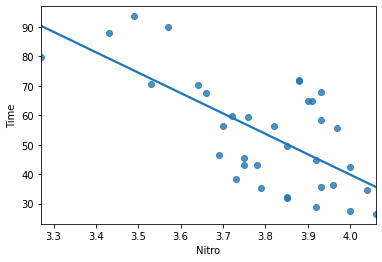

In [6]:
import seaborn as sns 

sns.regplot(x='Nitro', y = 'Time', data = longbones, ci = 0)

How do we address this unexplained variability?  

Well, one obvious place to start is to see if some of the other variables can help us understand why skeletons with the same nitrogen composition have different interment times.

We can do this by adding additional terms to our model and testing to see if they are statistically significant.


Simple linear regression model: $\hat{y} = \beta_0 + \beta_1x$

Multiple regresssion model: $\hat{y} = \beta_0 + \beta_1x + \beta_2x + \beta_3x +...$

As with simple linear regression, we use t-tests to determine if model features are statistically significantly associated with the target. 


Let's start by looking at Lime, which indicates if the body was buried with Quicklime or not.  


We can ask the question, "Does burial with Quicklime change the relationship between long bone nitrogen composition and interment time?"

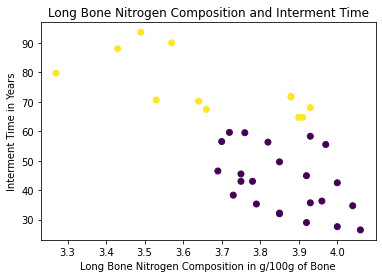

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

#Color the points differently depending on if the body was buried with Quicklime or not.
plt.scatter(x = longbones['Nitro'], y = longbones['Time'], c = longbones['Lime'])

ax.set_title('Long Bone Nitrogen Composition and Interment Time')
ax.set_xlabel('Long Bone Nitrogen Composition in g/100g of Bone')
ax.set_ylabel('Interment Time in Years')

plt.show()

There does seem to be a different pattern in the relationship between nitrogen composition and interment time depending on if the body was buried with Quicklime, and we can test this claim formally using a hypothesis test.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime

Now we can test the null hypothesis that burial with Quicklime is not associated with tnterrment time against the alternative hypothesis is that burial with Quicklime is associated with interment time.  In symbolic notation:

Ho: $\beta_2$ = 0

Ha: $\beta_2 \neq$ 0

In [15]:
model = ols('Time ~ Nitro + Lime', data = longbones).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     55.56
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.90e-11
Time:                        03:09:12   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             256.6
Df Residuals:                      32   BIC:                             261.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.4695     38.386      4.701      0.0

Now we see "Lime" appear in the model under Nitro alongside the model coefficient, standard error, t-test, p-value and CI.

Both Nitro and Lime are statistically significant predictors of interrment time so it makes sense to include both of them in our statistical model.

We can write the model using the coefficients shown in the table as:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime



When we have a model with more than one feature, we talk about each one being significantly associated with the target *after taking into account the effects of the other variables*.

After taking into account long bone nitrogen composition, burial with Quicklime is statistically significnatly associated with interrment time.

And vice versa.

After taking into account burial with Quicklime, long bone nitrogen composition is statistically associated with interment time.

Because we now have two significant predictors in our model instead of just one, we'd expect the percent of variability in y to be higher for the model with both nitrogen composition and Quicklime compared to the model with just nitrogen composition.

The output above gives us multiple mesures comparing model predictive ability and fit, but we are going to continue to focus on $R^2$ (AIC, BIC and log likelihood are all less easily interpretable measures of model fit).





However, regular old $R^2$ has one big problem. It will always go up when you enter more factors in the model, even if they aren't statistically significant.

Adjusted $R^2$ penalizes you just a little bit for adding in new model terms, so it will only increase if the new term really adds to the predictive ability of the model.

In the model with just nitrogen composition, adjusted $R^2$ = 0.433

In the model with both nitrogen composition and burial with Quicklime, adjusted $R^2$ = 0.762

That's a huge increase in predictive ability!


Now we can say that about 76% of the variability in interrment time can be explained by differences in long bone nitrogen composition and use of Quicklime at burial.

Can we do even better?????

Let's add burial depth to the model.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime + $\beta_3x$Depth

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with Quicklime - burial depth is not associated with interment time against the alternative hypothesis is that burial depth is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

In [20]:
# Adding depth in the equation now
model = ols('Time ~ Nitro + Lime', data = longbones).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     55.56
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.90e-11
Time:                        03:34:42   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             256.6
Df Residuals:                      32   BIC:                             261.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.4695     38.386      4.701      0.0

In this case we see that we **fail to reject the null hypothesis** and we conclude that - after accounting for nitrogen composition and burial with Quicklime - burial depth is not associated with interrment time.

Looking at the adjusted $R^2$, we see the predictive ability of this model falls a tiny bit to 0.75.

We will choose not to include burial depth in our model of interment time.  Our current best model remains:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime



We have one more variable to consider.  Let's add age at the time of death to the previous model and see if that adds to the predictive ability.

Our multiple regresssion model is: $\hat{y} = \beta_0 + \beta_1x$Nitro + $\beta_2x$Lime + $\beta_3x$Age

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with Quicklime - age at the time of death is not associated with interment time against the alternative hypothesis is that age at the time of death is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

In [28]:
# Adding Age in the equation now
model = ols('Time ~ Nitro + Lime + Age', data = longbones).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     35.91
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.30e-10
Time:                        03:45:01   Log-Likelihood:                -125.30
No. Observations:                  35   AIC:                             258.6
Df Residuals:                      31   BIC:                             264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    178.8066     40.704      4.393      0.0

Again we **fail to reject the null hypothesis** and we conclude that - after accounting for nitrogen composition and burial with Quicklime - age at the time of death is not associated with interrment time.  The adjusted $R^2$ also decreases as when we added burial depth.

Based on the data we have, the best model to predict interrment time of a skeleton is:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime

Let's play CSI one more time and use it to make predictions about how long a body has been interred for different values of long bone nitrogen composition and Quicklime application.

- A body that was not buried with Quicklime that has 3.88 g of nitrogen /100g of bone remaining in the long bones of the skeleton.

In [30]:
model = ols('Time ~ Nitro + Lime', data = longbones).fit()

x1 = 3.88
x2 = 0
intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

# Plug them into the regression equation
predicted = intercept + (slope1 * x1) + (slope2 * x2)

print (predicted)


42.2415606563803


In [31]:
longbones

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.60,1,65.0,3.88,0
4,1,70.6,7.50,1,42.0,3.53,0
5,1,68.0,7.00,1,28.0,3.93,0
6,1,71.6,8.00,1,35.0,3.88,0
7,1,70.2,6.00,1,44.0,3.64,0
8,1,55.5,6.00,0,29.0,3.97,0
10,1,36.3,6.50,0,48.0,3.96,0
11,1,46.5,6.50,0,35.0,3.69,0
13,1,45.5,6.50,0,34.0,3.75,0
14,1,43.0,6.50,0,38.0,3.75,0


We estimate this body has been buried for about 42.24 years.

* A body that was buried with Quicklime and has 3.59 g of nitrogen per 100g of bone remaining in the long bones of the skeleton.

In [32]:
model = ols('Time ~ Nitro + Lime', data = longbones).fit()

x1 = 3.59
x2 = 1
intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

# Plug them into the regression equation
predicted = intercept + (slope1 * x1) + (slope2 * x2)

print (predicted)



78.0235010553706


We expect this body has been buried for about 78 years.



---



What happens if I have a lot - like thousands - of potential features?

###The curse of dimensionality!

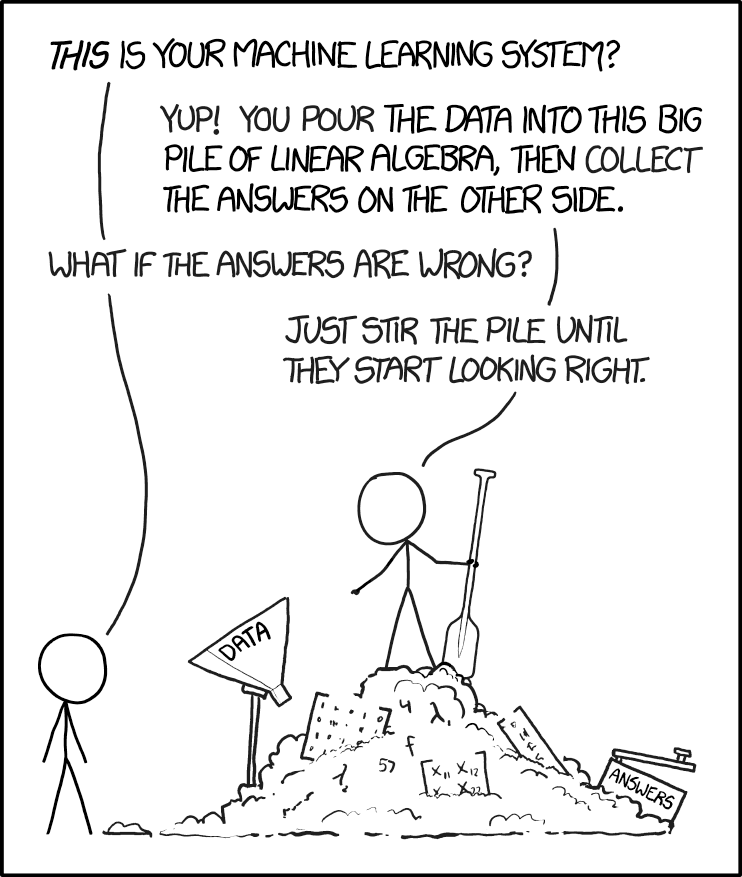

Regression and other machine learning methods do not work well if your dataset contains more columns than rows.

There are a few possible ways to handle this situation:
1. ___Eliminate_____________ you know are not related to the outcome.  For example, in a study relating smoking to eye disease, you can probably eliminate information about the participant's address and time of examination.

2. __Combine______________.  Price / square feet = price per square foot.

3. __Dimensionality reduction______________ like principal components analysis (Unit 2).

#Let's return to the sleep example

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [34]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


We've determined that the log of brain size, the log of life expenctancy and the log of gestation time were all _univariently_______________ associated with time spent in dreaming sleep.

In [36]:
#Calculate the log of brain size, body size, life expenctancy, and gestation time.

sleep['Log_brain'] = np.log(sleep['Brain'])
sleep['Log_life'] = np.log(sleep['Life'])
sleep['Log_gest'] = np.log(sleep['Gest'])


sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_brain,Log_life,Log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,1.887070,1.504077,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,8.434464,4.234107,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.190175,3.295837,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,-1.203973,2.944439,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.129899,3.414443,5.971262


Let's start by looking at the correlation between the log of brain size, life expectancy, and gestation time with time spent in dreaming sleep.

In [37]:
np.corrcoef(sleep['Log_brain'],sleep['Parasleep'])

array([[ 1.        , -0.36884187],
       [-0.36884187,  1.        ]])

In [39]:
np.corrcoef(sleep['Log_life'],sleep['Parasleep'])

array([[ 1.        , -0.38521174],
       [-0.38521174,  1.        ]])

In [38]:
np.corrcoef(sleep['Log_gest'],sleep['Parasleep'])

array([[ 1.        , -0.57234786],
       [-0.57234786,  1.        ]])

The correltion between gestational time and dreaming sleep is greatest.  Let's start with that model and look at the adjusted $R^2$.

In [40]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     19.49
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           7.48e-05
Time:                        04:09:20   Log-Likelihood:                -64.550
No. Observations:                  42   AIC:                             133.1
Df Residuals:                      40   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1762      0.763      6.782      0.0

The adjusted $R^2$ for the model is ______31%__________ of the variability in dreaming sleep time is explained by gestational time.

Let's try adding life expectancy to the model.

In [44]:
#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + Life', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.672
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           0.000388
Time:                        04:10:44   Log-Likelihood:                -64.425
No. Observations:                  42   AIC:                             134.8
Df Residuals:                      39   BIC:                             140.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3193      0.826      6.441      0.0

After accounting for gestational age, the log of life expectancy _is NOT_______________ associated with time spent in dreaming sleep.

Now let's see what happens if we add in the log of brain size.

In [45]:
#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + Log_brain', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     10.14
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           0.000284
Time:                        04:11:48   Log-Likelihood:                -64.089
No. Observations:                  42   AIC:                             134.2
Df Residuals:                      39   BIC:                             139.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7340      0.972      5.901      0.0

Nope... after accounting for gestational time, the log of brain size ___is not_____________ associated with time spent in dreaming sleep.

What about danger index?  - We'll focus on that because it is a feature that has been engineered to combine the exposure and predation index questions.

This is a categorical variable, so we have to add it into the model in a specific way.

In [46]:
#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Log_gest + C(Danger)', data=sleep).fit()

#Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.071
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.19e-05
Time:                        04:13:43   Log-Likelihood:                -55.763
No. Observations:                  42   AIC:                             123.5
Df Residuals:                      36   BIC:                             134.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8263      0.731      7.

The predictive ability of the model is greatly improved by adding in the danger index.  Now the adjusted $R^2$ is __.5______________.  About _____50%___________ of the variability in amount of __time spent______________ can be explained by __gestational time______________ and the danger index.

We can interpret the coefficient term for each of the danger index categories is the additional amount of dreaming sleep we expect animals in each danger category to get compared to animals in _danger category 1_______________.

We know that we are comparing to danger catetgory 1 because __it is missing______________.


Because the coefficients are all negative numbers, we can see that having a higher danger index corresponds to __less dreaming sleep______________.

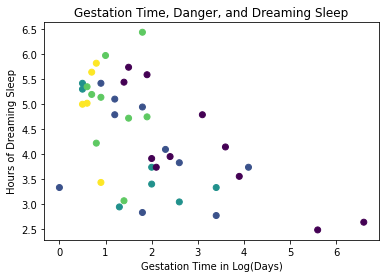

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

#Color the points differently depending the mammal's danger index
plt.scatter(x = sleep['Parasleep'], y = sleep['Log_gest'], c = sleep['Danger'])

ax.set_title('Gestation Time, Danger, and Dreaming Sleep')
ax.set_xlabel('Gestation Time in Log(Days)')
ax.set_ylabel('Hours of Dreaming Sleep')

plt.show()

The best model of dreaming sleep time includes both _gestational time and danger index_____________________.

Let's predict the amount of dreaming sleep an animal with a danger index of 2 and a 200 day gestational time gets each day.

In [58]:
#Look at some animals with a danger index of 2
sleep.loc[sleep['Danger'] == 2]


,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_brain,Log_life,Log_gest
10,Echidna,3.000,25.0,8.6,0.0,8.6,50.0,28.0,2,2,2,3.218876,3.912023,3.332205
11,European_hedgehog,0.785,3.5,6.6,4.1,10.7,6.0,42.0,2,2,2,1.252763,1.791759,3.737670
12,Galago,0.200,5.0,9.5,1.2,10.7,10.4,120.0,2,2,2,1.609438,2.341806,4.787492
14,Golden_hamster,0.120,1.0,11.0,3.4,14.4,3.9,16.0,3,1,2,0.000000,1.360977,2.772589
26,Owl_monkey,0.480,15.5,15.2,1.8,17.0,12.0,140.0,2,2,2,2.740840,2.484907,4.941642
28,Phanlanger,1.620,11.4,11.9,1.8,13.7,13.0,17.0,2,1,2,2.433613,2.564949,2.833213
33,Rhesus_monkey,6.800,179.0,8.4,1.2,9.6,29.0,164.0,2,3,2,5.187386,3.367296,5.099866
34,Rock_hyrax_(Hetero_b),0.750,12.3,5.7,0.9,6.6,7.0,225.0,2,2,2,2.509599,1.945910,5.416100
37,Tenrec,0.900,2.6,11.0,2.3,13.3,4.5,60.0,2,1,2,0.955511,1.504077,4.094345
39,Tree_shrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2,0.916291,0.832909,3.828641


In [60]:
#Figure out which paramter belongs to which spot in the model output.
model.params


Intercept         5.826291
C(Danger)[T.2]   -1.231949
C(Danger)[T.3]   -1.536780
C(Danger)[T.4]   -1.398900
C(Danger)[T.5]   -1.877197
Log_gest         -0.652325
dtype: float64

In [61]:
#Make sure we're working with the correct model
model = ols('Parasleep ~ Log_gest + C(Danger)', data=sleep).fit()

#Specify the values of x we'd like to predict
x1 = np.log(200) # gest. time of 200 days
x2 = 1 # danger index of 2
#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope1 = model.params[5]
slope2 = model.params[1]

#Use the model coefficients and plug the new value of x into the regression equation
predicted = intercept + slope1*x1 + slope2*x2

print(predicted)


1.1381157675975642


We expect a mammal that gestates her young for 200 days and has a danger index of 2 to get about ____1.14__________________ hours of dreaming sleep each night.

###One final word of warning:

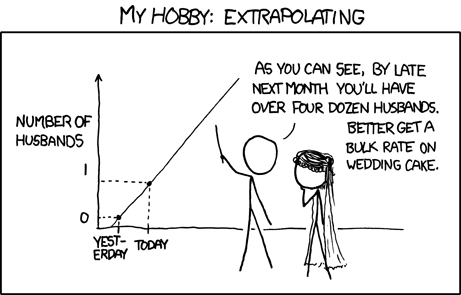